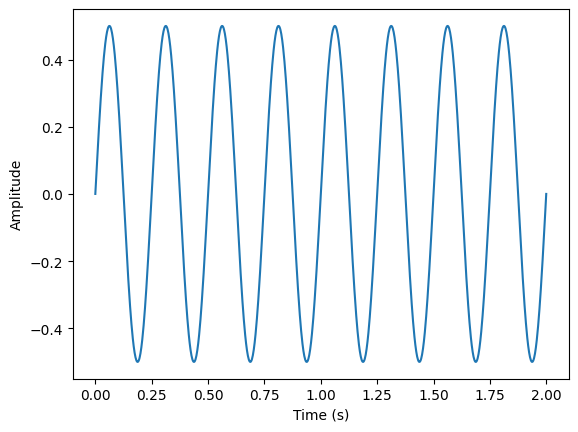

In [115]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2, 1000)
sin = 0.5 * np.sin(2 * np.pi * 4 * t)

plt.plot(t, sin)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

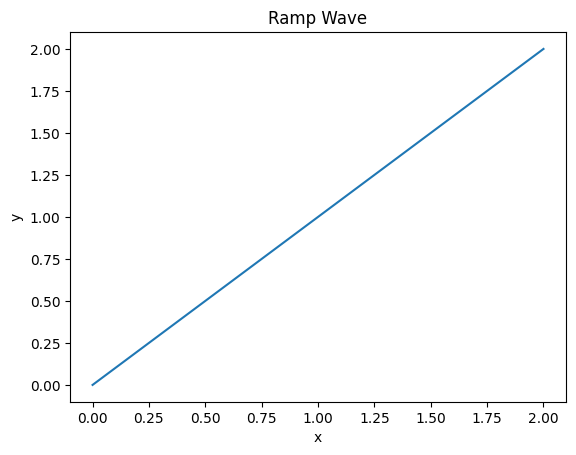

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Generate ramp wave using numpy
x = np.linspace(0, 2, 1000)  # Create a linearly spaced array of 100 points between 0 and 10
y = x  # The ramp wave is simply the same as the input x

# Plot the ramp wave using matplotlib
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ramp Wave')
plt.show()

In [117]:
mixedSignal = np.vstack([sin, x])
print(mixedSignal.shape)
mixingMatrix = np.array([[0.5, 1], [1, 0.5]])
print(mixingMatrix.shape)
mult = mixingMatrix@mixedSignal

mult = mult - mult.mean(axis=1, keepdims=True)
mult


(2, 1000)
(2, 2)


array([[-1.        , -0.98542436, -0.97088054, ...,  0.97088054,
         0.98542436,  1.        ],
       [-0.5       , -0.47385171, -0.44776708, ...,  0.44776708,
         0.47385171,  0.5       ]])

In [118]:
def g(x):
    return np.tanh(x)
def g_der(x):
    return 1 - g(x) * g(x)
def whitening(X):
    cov = np.cov(X)
    d, E = np.linalg.eigh(cov)
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    return X_whiten

def calculate_new_w(w, X):
    w_new = (X * g(np.dot(w.T, X))).mean(axis=1) - g_der(np.dot(w.T, X)).mean() * w
    w_new /= np.sqrt((w_new ** 2).sum())
    return w_new

def ica(X, iterations, tolerance=1e-5):
    X = whitening(X)
        
    components_nr = X.shape[0]
    W = np.zeros((components_nr, components_nr), dtype=X.dtype)
    for i in range(components_nr):
        
        w = np.random.rand(components_nr)
        
        for j in range(iterations):
            
            w_new = calculate_new_w(w, X)
            
            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            
            w = w_new
            
            if distance < tolerance:
                break
                
        W[i, :] = w
        
    S = np.dot(W, X)
    
    return S



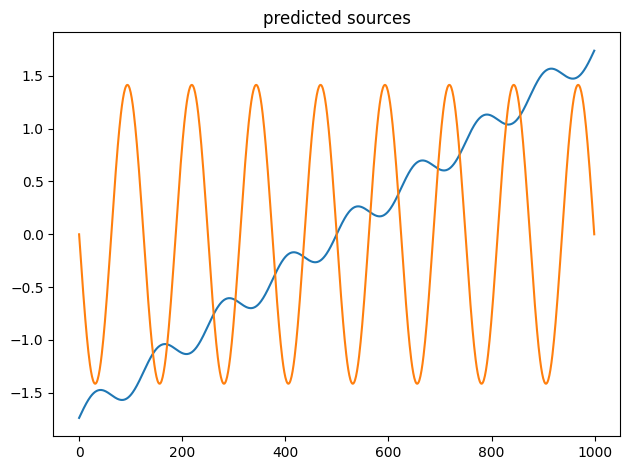

In [120]:
def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure()
    

    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    
    fig.tight_layout()
    plt.show()
    
S = ica(mult, iterations=100)
plot_mixture_sources_predictions(mult, mixedSignal, S)